In [1]:
import warnings
warnings.filterwarnings('ignore')

import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
response_API = requests.get('https://fantasy.premierleague.com/api/bootstrap-static/')
data = response_API.text
parse_json = json.loads(data)
parse_json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [4]:
events = pd.DataFrame.from_dict(parse_json['events'])
events.head(24)

,id,name,deadline_time,release_time,average_entry_score,finished,data_checked,highest_scoring_entry,deadline_time_epoch,deadline_time_game_offset,highest_score,is_previous,is_current,is_next,cup_leagues_created,h2h_ko_matches_created,ranked_count,chip_plays,most_selected,most_transferred_in,top_element,top_element_info,transfers_made,most_captained,most_vice_captained
0,1,Gameweek 1,2023-08-11T17:30:00Z,None,64,True,True,3383750.0,1691775000,0,127.0,False,False,False,False,False,0,"[{'chip_name': 'bboost', 'num_played': 163222}...",355.0,1.0,395.0,"{'id': 395, 'points': 14}",0,355.0,19.0
1,2,Gameweek 2,2023-08-18T17:15:00Z,None,44,True,True,3338487.0,1692378900,0,120.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 126778}...",355.0,195.0,108.0,"{'id': 108, 'points': 16}",13130353,355.0,19.0
2,3,Gameweek 3,2023-08-25T17:30:00Z,None,44,True,True,9368956.0,1692984600,0,128.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 124110}...",355.0,108.0,216.0,"{'id': 216, 'points': 19}",17619532,355.0,19.0
3,4,Gameweek 4,2023-09-01T17:30:00Z,None,72,True,True,4354697.0,1693589400,0,148.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 109196}...",355.0,216.0,516.0,"{'id': 516, 'points': 20}",16035365,355.0,19.0
4,5,Gameweek 5,2023-09-16T10:00:00Z,None,44,True,True,6211182.0,1694858400,0,102.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 96469},...",355.0,516.0,344.0,"{'id': 344, 'points': 13}",14363988,355.0,19.0
5,6,Gameweek 6,2023-09-23T12:30:00Z,None,68,True,True,4494759.0,1695472200,0,142.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 78528},...",355.0,343.0,430.0,"{'id': 430, 'points': 18}",12109066,355.0,308.0
6,7,Gameweek 7,2023-09-30T10:00:00Z,None,49,True,True,9335002.0,1696068000,0,156.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 79672},...",355.0,430.0,60.0,"{'id': 60, 'points': 23}",15579302,355.0,308.0
7,8,Gameweek 8,2023-10-07T10:00:00Z,None,44,True,True,10068163.0,1696672800,0,120.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 53401},...",355.0,516.0,216.0,"{'id': 216, 'points': 16}",19444885,355.0,355.0
8,9,Gameweek 9,2023-10-21T10:00:00Z,None,67,True,True,6931177.0,1697882400,0,152.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 50175},...",355.0,60.0,423.0,"{'id': 423, 'points': 17}",11431916,355.0,308.0
9,10,Gameweek 10,2023-10-27T17:30:00Z,None,66,True,True,9895223.0,1698427800,0,134.0,False,False,False,True,True,0,"[{'chip_name': 'bboost', 'num_played': 80903},...",355.0,60.0,13.0,"{'id': 13, 'points': 17}",12428517,355.0,355.0


In [5]:
parse_json['game_settings']

{'league_join_private_max': 30,
 'league_join_public_max': 5,
 'league_max_size_public_classic': 20,
 'league_max_size_public_h2h': 16,
 'league_max_size_private_h2h': 16,
 'league_max_ko_rounds_private_h2h': 3,
 'league_prefix_public': 'League',
 'league_points_h2h_win': 3,
 'league_points_h2h_lose': 0,
 'league_points_h2h_draw': 1,
 'league_ko_first_instead_of_random': False,
 'cup_start_event_id': None,
 'cup_stop_event_id': None,
 'cup_qualifying_method': None,
 'cup_type': None,
 'featured_entries': [],
 'percentile_ranks': [1,
  5,
  10,
  15,
  20,
  25,
  30,
  35,
  40,
  45,
  50,
  55,
  60,
  65,
  70,
  75,
  80,
  95,
  90,
  95],
 'squad_squadplay': 11,
 'squad_squadsize': 15,
 'squad_team_limit': 3,
 'squad_total_spend': 1000,
 'ui_currency_multiplier': 10,
 'ui_use_special_shirts': False,
 'ui_special_shirt_exclusions': [],
 'stats_form_days': 30,
 'sys_vice_captain_enabled': True,
 'transfers_cap': 20,
 'transfers_sell_on_fee': 0.5,
 'league_h2h_tiebreak_stats': ['+go

In [6]:
parse_json['phases']

[{'id': 1, 'name': 'Overall', 'start_event': 1, 'stop_event': 38},
 {'id': 2, 'name': 'August', 'start_event': 1, 'stop_event': 3},
 {'id': 3, 'name': 'September', 'start_event': 4, 'stop_event': 7},
 {'id': 4, 'name': 'October', 'start_event': 8, 'stop_event': 10},
 {'id': 5, 'name': 'November', 'start_event': 11, 'stop_event': 13},
 {'id': 6, 'name': 'December', 'start_event': 14, 'stop_event': 20},
 {'id': 7, 'name': 'January', 'start_event': 21, 'stop_event': 22},
 {'id': 8, 'name': 'February', 'start_event': 23, 'stop_event': 26},
 {'id': 9, 'name': 'March', 'start_event': 27, 'stop_event': 30},
 {'id': 10, 'name': 'April', 'start_event': 31, 'stop_event': 35},
 {'id': 11, 'name': 'May', 'start_event': 36, 'stop_event': 38}]

In [7]:
teams = pd.DataFrame.from_dict(parse_json['teams'])
teams.head()

,code,draw,form,id,loss,name,played,points,position,short_name,strength,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,4,None,False,0,1220,1260,1270,1280,1170,1240,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,3,None,False,0,1130,1235,1120,1220,1130,1250,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,3,None,False,0,1095,1100,1070,1120,1130,1110,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,3,None,False,0,1120,1155,1120,1130,1120,1180,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,3,None,False,0,1130,1185,1100,1120,1160,1250,131


In [8]:
parse_json['total_players']

10645877

In [9]:
elements = pd.DataFrame.from_dict(parse_json['elements'])
elements.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,starts,expected_goals,expected_assists,expected_goal_involvements,expected_goals_conceded,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text,expected_goals_per_90,saves_per_90,expected_assists_per_90,expected_goal_involvements_per_90,expected_goals_conceded_per_90,goals_conceded_per_90,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,0.0,0.0,232223,0,0,-1,1,0,4,0.0,0.0,0,Folarin,0.0,1,False,Transferred to Monaco,2023-08-31T08:55:15.272751Z,44,232223.jpg,0.0,Balogun,0.2,False,None,u,1,3,0,10024,0,62745,116,0.0,0.0,Balogun,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,662,67,651,67,620,64,666,68,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,541,96,565,51,671,71,328,52,0.00,0.00
1,NaN,NaN,58822,0,0,-1,1,0,2,0.5,0.0,0,Cédric,0.0,2,False,,None,39,58822.jpg,0.0,Alves Soares,0.4,False,None,a,1,3,0,35724,191,44199,475,0.0,0.0,Cédric,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0.00,0.00,524,185,504,184,457,166,528,184,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,759,237,373,123,531,180,256,99,0.00,0.00
2,100.0,75.0,153256,0,0,-1,1,0,3,0.5,0.0,0,Mohamed,0.0,3,False,,2023-12-30T22:30:09.113694Z,44,153256.jpg,4.0,Elneny,0.1,False,None,a,1,3,4,12895,54,19359,90,0.0,0.9,M.Elneny,1,0,1,0,0,0,0,0,0,0,0,0,12,1.8,0.5,2.0,0.4,0,0.00,0.00,0.00,0.00,503,228,473,229,439,217,498,225,NaN,,NaN,,NaN,,0.00,0.0,0.00,0.00,0.00,0.00,511,301,549,194,52,32,469,157,0.00,0.00
3,50.0,50.0,438098,0,0,-1,1,0,3,0.2,0.0,0,Fábio,0.0,4,False,Lack of match fitness - 50% chance of playing,2023-12-07T12:00:08.489004Z,54,438098.jpg,2.6,Ferreira Vieira,0.1,False,None,d,1,3,21,11493,9,18733,54,0.0,3.9,Fábio Vieira,236,1,3,1,2,0,0,0,0,1,0,0,62,79.4,63.6,77.0,21.9,2,1.20,0.35,1.55,1.48,355,153,291,159,234,126,341,153,NaN,,NaN,,4.0,,0.46,0.0,0.13,0.59,0.56,0.76,124,77,775,334,214,94,444,145,0.76,0.38
4,100.0,100.0,226597,0,0,0,0,2,2,6.5,6.0,-1,Gabriel,6.0,5,False,,2024-01-20T15:30:09.437664Z,50,226597.jpg,3.6,dos Santos Magalhães,18.8,False,None,a,1,3,76,1732479,64994,2731458,24679,1.2,15.2,Gabriel,1724,2,1,6,19,1,0,0,2,0,0,6,352,397.8,88.7,169.0,65.7,19,2.25,0.40,2.65,15.88,75,27,245,70,136,15,135,27,NaN,,NaN,,NaN,,0.12,0.0,0.02,0.14,0.83,0.99,198,23,24,4,86,13,18,6,0.99,0.31


In [10]:
elements = elements.set_index('id')

In [11]:
parse_json['element_stats']

[{'label': 'Minutes played', 'name': 'minutes'},
 {'label': 'Goals scored', 'name': 'goals_scored'},
 {'label': 'Assists', 'name': 'assists'},
 {'label': 'Clean sheets', 'name': 'clean_sheets'},
 {'label': 'Goals conceded', 'name': 'goals_conceded'},
 {'label': 'Own goals', 'name': 'own_goals'},
 {'label': 'Penalties saved', 'name': 'penalties_saved'},
 {'label': 'Penalties missed', 'name': 'penalties_missed'},
 {'label': 'Yellow cards', 'name': 'yellow_cards'},
 {'label': 'Red cards', 'name': 'red_cards'},
 {'label': 'Saves', 'name': 'saves'},
 {'label': 'Bonus', 'name': 'bonus'},
 {'label': 'Bonus Points System', 'name': 'bps'},
 {'label': 'Influence', 'name': 'influence'},
 {'label': 'Creativity', 'name': 'creativity'},
 {'label': 'Threat', 'name': 'threat'},
 {'label': 'ICT Index', 'name': 'ict_index'},
 {'label': 'Game(s) Started', 'name': 'starts'},
 {'label': 'Expected Goals', 'name': 'expected_goals'},
 {'label': 'Expected Assists', 'name': 'expected_assists'},
 {'label': 'Expe

In [12]:
parse_json['element_types']

[{'id': 1,
  'plural_name': 'Goalkeepers',
  'plural_name_short': 'GKP',
  'singular_name': 'Goalkeeper',
  'singular_name_short': 'GKP',
  'squad_select': 2,
  'squad_min_play': 1,
  'squad_max_play': 1,
  'ui_shirt_specific': True,
  'sub_positions_locked': [12],
  'element_count': 92},
 {'id': 2,
  'plural_name': 'Defenders',
  'plural_name_short': 'DEF',
  'singular_name': 'Defender',
  'singular_name_short': 'DEF',
  'squad_select': 5,
  'squad_min_play': 3,
  'squad_max_play': 5,
  'ui_shirt_specific': False,
  'sub_positions_locked': [],
  'element_count': 261},
 {'id': 3,
  'plural_name': 'Midfielders',
  'plural_name_short': 'MID',
  'singular_name': 'Midfielder',
  'singular_name_short': 'MID',
  'squad_select': 5,
  'squad_min_play': 2,
  'squad_max_play': 5,
  'ui_shirt_specific': False,
  'sub_positions_locked': [],
  'element_count': 352},
 {'id': 4,
  'plural_name': 'Forwards',
  'plural_name_short': 'FWD',
  'singular_name': 'Forward',
  'singular_name_short': 'FWD',
  

# New API Discovered
https://fantasy.premierleague.com/api/leagues-classic/314/standings/?page_new_entries=1&page_standings=1&phase=1

this api return the managers rank and data to help us to study pro managers behavior.

In [13]:
standings = pd.DataFrame()

In [14]:
for i in range(1,21):
    response_API = requests.get('https://fantasy.premierleague.com/api/leagues-classic/314/standings/?page_new_entries=1&page_standings='+str(i)+'&phase=1')
    #print(response_API.status_code)
    data = response_API.text
    parse_json = json.loads(data)
    if standings.empty:
        standings = pd.DataFrame.from_dict(parse_json['standings']['results'])
    else:
        standings = pd.concat([standings,pd.DataFrame.from_dict(parse_json['standings']['results'])])

In [15]:
standings.shape

(1000, 9)

In [16]:
standings.head()

,id,event_total,player_name,rank,last_rank,rank_sort,total,entry,entry_name
0,157281,97,Sundeep Jaswal,1,6,1,1563,27371,Alexandra Greats
1,63946818,94,Ben Harrowven,2,9,2,1554,7601080,A bear itchy mezze
2,60749659,119,Twin Mo,3,117,3,1547,7287366,WeSchnetCuhhh
3,1266703,72,h3_1e .🇮🇶,4,2,4,1545,212473,hsen ali
4,6103425,83,Ben Harding,5,8,5,1544,967320,The Stones


In [17]:
standings.describe()

,id,event_total,rank,last_rank,rank_sort,total,entry
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1.768126e+07,85.24500,498.178000,1116.496000,500.500000,1492.043000,2.373321e+06
std,1.825941e+07,13.10873,287.761879,1291.450443,288.819436,12.995077,2.221984e+06
min,5.380000e+02,46.00000,1.000000,1.000000,1.000000,1479.000000,1.080000e+02
25%,2.898786e+06,77.00000,250.750000,273.000000,250.750000,1483.000000,4.722795e+05
50%,1.119865e+07,86.00000,497.000000,686.000000,500.500000,1488.000000,1.716749e+06
75%,2.715589e+07,95.00000,745.000000,1497.500000,750.250000,1497.250000,3.798669e+06
max,6.796883e+07,121.00000,1000.000000,9147.000000,1000.000000,1563.000000,8.003104e+06


<AxesSubplot:>

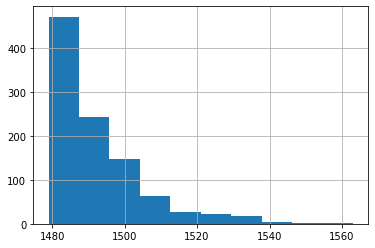

In [18]:
standings['total'].hist()

<AxesSubplot:>

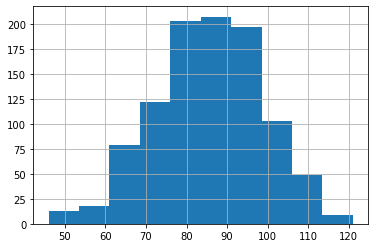

In [19]:
standings['event_total'].hist()

# This API give you detailed pickup for specific manager in specific gameweek
https://fantasy.premierleague.com/api/entry/[team-id]/event/[GW]/picks/

In [20]:
def get_pickups_for_top_managers(gw_number, top_managers_ids):
    picks_for_top_1000_manager_list = []
    i=1
    for entry in top_managers_ids:
        response_API = requests.get('https://fantasy.premierleague.com/api/entry/'+str(entry)+'/event/'+str(gw_number)+'/picks/')
        #print(response_API.status_code)
        data = response_API.text
        parse_json = json.loads(data)
        '''if picks_for_top_1000_manager.empty:
            picks_for_top_1000_manager = pd.DataFrame.from_dict(parse_json['picks'])
        else:
            picks_for_top_1000_manager = pd.concat([picks_for_top_1000_manager,pd.DataFrame.from_dict(parse_json['picks'])])
        '''

        picks_for_top_1000_manager_list+=parse_json['picks']
        print("Completed: {:.2f}%".format((i/1000)*100), end='\r')
        i+=1
    picks_for_top_1000_manager = pd.DataFrame(picks_for_top_1000_manager_list)
    return picks_for_top_1000_manager

In [21]:
gw_number = events['id'].iloc[events[events['is_current'] == True].index[0]]
picks_for_top_1000_manager = get_pickups_for_top_managers(gw_number,standings['entry'])
picks_for_top_1000_manager.shape

(15000, 5)

In [22]:
picks_for_top_1000_manager.head()

,element,position,multiplier,is_captain,is_vice_captain
0,113,1,1,False,False
1,369,2,1,False,False
2,203,3,1,False,False
3,32,4,1,False,False
4,19,5,1,False,False


In [24]:
'''gw_number = events['id'].iloc[events[events['is_current'] == True].index[0]]
i=1
for entry in standings['entry']:
    response_API = requests.get('https://fantasy.premierleague.com/api/entry/'+str(entry)+'/event/'+str(gw_number)+'/picks/')
    #print(response_API.status_code)
    data = response_API.text
    parse_json = json.loads(data)
    '''
    '''if picks_for_top_1000_manager.empty:
        picks_for_top_1000_manager = pd.DataFrame.from_dict(parse_json['picks'])
    else:
        picks_for_top_1000_manager = pd.concat([picks_for_top_1000_manager,pd.DataFrame.from_dict(parse_json['picks'])])
    '''
    '''
    
    picks_for_top_1000_manager_list+=parse_json['picks']
    print("Completed: {:.2f}%".format((i/1000)*100), end='\r')
    i+=1
#print('Number of picks:',len(picks_for_top_1000_manager_list))
#picks_for_top_1000_manager.to_csv('GW'+str(gw_number)+'_picks_for_top_1000_manager.csv')
#picks_for_top_1000_manager.shape'''

IndentationError: unexpected indent (4211405155.py, line 9)

In [23]:
picks_for_top_1000_manager.to_csv('GW'+str(gw_number)+'_picks_for_top_1000_manager.csv')

In [24]:
print('GW'+str(gw_number)+'_picks_for_top_1000_manager.csv')
picks_for_top_1000_manager= pd.read_csv('GW'+str(gw_number)+'_picks_for_top_1000_manager.csv')

GW23_picks_for_top_1000_manager.csv


In [25]:
picks_for_top_1000_manager['element'] = picks_for_top_1000_manager['element'].astype("category")
picks_for_top_1000_manager.describe(include='all')

,Unnamed: 0,element,position,multiplier,is_captain,is_vice_captain
count,15000.000000,15000.0,15000.000000,15000.000000,15000,15000
unique,NaN,191.0,NaN,NaN,2,2
top,NaN,60.0,NaN,NaN,False,False
freq,NaN,965.0,NaN,NaN,14000,14000
mean,7499.500000,NaN,8.000000,0.803467,NaN,NaN
std,4330.271354,NaN,4.320638,0.539686,NaN,NaN
min,0.000000,NaN,1.000000,0.000000,NaN,NaN
25%,3749.750000,NaN,4.000000,0.000000,NaN,NaN
50%,7499.500000,NaN,8.000000,1.000000,NaN,NaN
75%,11249.250000,NaN,12.000000,1.000000,NaN,NaN


In [26]:
picks_for_top_100_manager = picks_for_top_1000_manager.head(1500)
picks_for_top_100_manager.describe(include = 'all')

,Unnamed: 0,element,position,multiplier,is_captain,is_vice_captain
count,1500.000000,1500.0,1500.000000,1500.000000,1500,1500
unique,NaN,120.0,NaN,NaN,2,2
top,NaN,60.0,NaN,NaN,False,False
freq,NaN,97.0,NaN,NaN,1400,1400
mean,749.500000,NaN,8.000000,0.810667,NaN,NaN
std,433.157015,NaN,4.321935,0.535734,NaN,NaN
min,0.000000,NaN,1.000000,0.000000,NaN,NaN
25%,374.750000,NaN,4.000000,0.000000,NaN,NaN
50%,749.500000,NaN,8.000000,1.000000,NaN,NaN
75%,1124.250000,NaN,12.000000,1.000000,NaN,NaN


In [27]:
players_pick_count_for_top_1000_manager = picks_for_top_1000_manager['element'].value_counts().reset_index().rename(columns={'index':'player_id','element':'count'})
players_pick_count_for_top_1000_manager.describe()

,count
count,191.000000
mean,78.534031
std,180.485654
min,1.000000
25%,2.500000
50%,12.000000
75%,45.000000
max,965.000000


In [28]:
players_pick_count_for_top_100_manager = picks_for_top_100_manager['element'].value_counts().reset_index().rename(columns={'index':'player_id','element':'count'})
players_pick_count_for_top_100_manager = players_pick_count_for_top_100_manager[players_pick_count_for_top_100_manager['count']>0]
players_pick_count_for_top_100_manager.shape

(120, 2)

In [29]:
players_pick_count_for_top_1000_manager['percentage_over_1000'] = (players_pick_count_for_top_1000_manager['count']/1000)*100

In [30]:
players_pick_count_for_top_1000_manager.describe()

,count,percentage_over_1000
count,191.000000,191.000000
mean,78.534031,7.853403
std,180.485654,18.048565
min,1.000000,0.100000
25%,2.500000,0.250000
50%,12.000000,1.200000
75%,45.000000,4.500000
max,965.000000,96.500000


In [31]:
players_pick_count_for_top_100_manager['percentage_over_100'] = (players_pick_count_for_top_100_manager['count']/100)*100

In [32]:
players_pick_count_for_top_100_manager.describe()

,count,percentage_over_100
count,120.000000,120.000000
mean,12.500000,12.500000
std,21.273726,21.273726
min,1.000000,1.000000
25%,1.000000,1.000000
50%,3.000000,3.000000
75%,10.250000,10.250000
max,97.000000,97.000000


In [33]:
players_pick_count_for_top_1000_manager.head(20)

,player_id,count,percentage_over_1000
0,60,965,96.5
1,362,944,94.4
2,19,815,81.5
3,353,793,79.3
4,524,734,73.4
5,506,705,70.5
6,509,656,65.6
7,355,624,62.4
8,85,617,61.7
9,5,591,59.1


In [34]:
players_pick_count_for_top_1000_manager = players_pick_count_for_top_1000_manager.set_index('player_id')

In [35]:
players_pick_count_for_top_1000_manager.index

CategoricalIndex([ 60, 362,  19, 353, 524, 506, 509, 355,  85,   5,
                  ...
                  302, 300, 542, 546, 286, 266, 259, 256, 221, 776],
                 categories=[5, 8, 12, 14, 19, 20, 27, 28, ...], ordered=False, dtype='category', name='player_id', length=191)

In [36]:
players_pick_count_for_top_100_manager = players_pick_count_for_top_100_manager.set_index('player_id')

In [37]:
players_pick_count_for_top_100_manager.index

CategoricalIndex([ 60, 362,  19, 353, 509, 506, 524, 355,   5,  85,
                  ...
                   12, 219, 344, 221, 228, 217, 341, 703, 311,  27],
                 categories=[5, 8, 12, 14, 19, 20, 27, 28, ...], ordered=False, dtype='category', name='player_id', length=120)

In [38]:
top=[]
for player_id in players_pick_count_for_top_1000_manager.index:
    top.append({'id':player_id, 'name':elements.loc[player_id]['web_name'],'element_type':elements.loc[player_id]['element_type'], 'top_1000_owned_percentage':players_pick_count_for_top_1000_manager.loc[player_id]['percentage_over_1000'],'overall_owned_percentage':elements.loc[player_id]['selected_by_percent']})
top

[{'id': 60,
  'name': 'Watkins',
  'element_type': 4,
  'top_1000_owned_percentage': 96.5,
  'overall_owned_percentage': '53.5'},
 {'id': 362,
  'name': 'Palmer',
  'element_type': 3,
  'top_1000_owned_percentage': 94.39999999999999,
  'overall_owned_percentage': '39.4'},
 {'id': 19,
  'name': 'Saka',
  'element_type': 3,
  'top_1000_owned_percentage': 81.5,
  'overall_owned_percentage': '59.8'},
 {'id': 353,
  'name': 'Foden',
  'element_type': 3,
  'top_1000_owned_percentage': 79.3,
  'overall_owned_percentage': '28.5'},
 {'id': 524,
  'name': 'Areola',
  'element_type': 1,
  'top_1000_owned_percentage': 73.4,
  'overall_owned_percentage': '36.2'},
 {'id': 506,
  'name': 'Pedro Porro',
  'element_type': 2,
  'top_1000_owned_percentage': 70.5,
  'overall_owned_percentage': '33.6'},
 {'id': 509,
  'name': 'Richarlison',
  'element_type': 3,
  'top_1000_owned_percentage': 65.60000000000001,
  'overall_owned_percentage': '17.3'},
 {'id': 355,
  'name': 'Haaland',
  'element_type': 4,
  '

In [39]:
top_owned_players_for_top_1000_manager = pd.DataFrame.from_dict(top)
top_owned_players_for_top_1000_manager.head(15)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
0,60,Watkins,4,96.5,53.5
1,362,Palmer,3,94.4,39.4
2,19,Saka,3,81.5,59.8
3,353,Foden,3,79.3,28.5
4,524,Areola,1,73.4,36.2
5,506,Pedro Porro,2,70.5,33.6
6,509,Richarlison,3,65.6,17.3
7,355,Haaland,4,62.4,64.8
8,85,Solanke,4,61.7,25.3
9,5,Gabriel,2,59.1,18.8


In [40]:
top=[]
for player_id in players_pick_count_for_top_100_manager.index:
    top.append({'id':player_id, 'name':elements.loc[player_id]['web_name'],'element_type':elements.loc[player_id]['element_type'], 'top_100_owned_percentage':players_pick_count_for_top_100_manager.loc[player_id]['percentage_over_100'],'overall_owned_percentage':elements.loc[player_id]['selected_by_percent']})
top

[{'id': 60,
  'name': 'Watkins',
  'element_type': 4,
  'top_100_owned_percentage': 97.0,
  'overall_owned_percentage': '53.5'},
 {'id': 362,
  'name': 'Palmer',
  'element_type': 3,
  'top_100_owned_percentage': 92.0,
  'overall_owned_percentage': '39.4'},
 {'id': 19,
  'name': 'Saka',
  'element_type': 3,
  'top_100_owned_percentage': 86.0,
  'overall_owned_percentage': '59.8'},
 {'id': 353,
  'name': 'Foden',
  'element_type': 3,
  'top_100_owned_percentage': 80.0,
  'overall_owned_percentage': '28.5'},
 {'id': 509,
  'name': 'Richarlison',
  'element_type': 3,
  'top_100_owned_percentage': 73.0,
  'overall_owned_percentage': '17.3'},
 {'id': 506,
  'name': 'Pedro Porro',
  'element_type': 2,
  'top_100_owned_percentage': 68.0,
  'overall_owned_percentage': '33.6'},
 {'id': 524,
  'name': 'Areola',
  'element_type': 1,
  'top_100_owned_percentage': 66.0,
  'overall_owned_percentage': '36.2'},
 {'id': 355,
  'name': 'Haaland',
  'element_type': 4,
  'top_100_owned_percentage': 62.0,


In [41]:
top_owned_players_for_top_100_manager = pd.DataFrame.from_dict(top)
top_owned_players_for_top_100_manager.head(15)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
0,60,Watkins,4,97.0,53.5
1,362,Palmer,3,92.0,39.4
2,19,Saka,3,86.0,59.8
3,353,Foden,3,80.0,28.5
4,509,Richarlison,3,73.0,17.3
5,506,Pedro Porro,2,68.0,33.6
6,524,Areola,1,66.0,36.2
7,355,Haaland,4,62.0,64.8
8,5,Gabriel,2,62.0,18.8
9,85,Solanke,4,56.0,25.3


In [42]:
top_owned_GK_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==1]
top_owned_GK_for_top_1000_manager.shape

(27, 5)

In [43]:
top_owned_GK_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==1]
top_owned_GK_for_top_100_manager.shape

(18, 5)

In [44]:
top_owned_GK_for_top_1000_manager

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
4,524,Areola,1,73.4,36.2
10,409,Dubravka,1,51.2,9.0
23,28,Turner,1,13.2,11.9
28,275,Leno,1,10.9,16.2
30,113,Raya,1,9.8,6.2
36,49,Martinez,1,7.3,12.6
38,263,Pickford,1,7.2,10.4
47,77,Neto,1,4.8,3.4
54,352,Ederson M.,1,3.8,15.0
59,301,Kelleher,1,2.7,1.5


In [45]:
top_owned_GK_for_top_100_manager

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
6,524,Areola,1,66.0,36.2
12,409,Dubravka,1,39.0,9.0
19,275,Leno,1,19.0,16.2
20,113,Raya,1,16.0,6.2
26,28,Turner,1,12.0,11.9
38,49,Martinez,1,8.0,12.6
39,77,Neto,1,8.0,3.4
41,352,Ederson M.,1,7.0,15.0
47,263,Pickford,1,6.0,10.4
52,301,Kelleher,1,4.0,1.5


In [46]:
top_owned_DF_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==2]
top_owned_DF_for_top_1000_manager.shape

(81, 5)

In [47]:
top_owned_DF_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==2]
top_owned_DF_for_top_100_manager.shape

(54, 5)

In [48]:
top_owned_DF_for_top_1000_manager.head(20)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
5,506,Pedro Porro,2,70.5,33.6
9,5,Gabriel,2,59.1,18.8
11,131,Estupiñan,2,47.8,27.9
12,290,Alexander-Arnold,2,45.6,21.5
13,430,Trippier,2,35.6,41.1
18,369,Walker,2,24.9,17.7
19,20,Saliba,2,22.7,36.0
20,203,Gusto,2,18.4,6.9
21,178,Taylor,2,18.1,4.2
24,48,Konsa,2,12.2,2.8


In [49]:
top_owned_DF_for_top_100_manager.head(20)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
5,506,Pedro Porro,2,68.0,33.6
8,5,Gabriel,2,62.0,18.8
10,131,Estupiñan,2,52.0,27.9
11,290,Alexander-Arnold,2,47.0,21.5
14,369,Walker,2,32.0,17.7
16,430,Trippier,2,30.0,41.1
21,203,Gusto,2,16.0,6.9
22,31,Zinchenko,2,15.0,10.2
23,20,Saliba,2,15.0,36.0
24,321,Doughty,2,14.0,6.0


In [50]:
top_owned_MID_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==3]
top_owned_MID_for_top_1000_manager.shape

(56, 5)

In [51]:
top_owned_MID_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==3]
top_owned_MID_for_top_100_manager.shape

(32, 5)

In [52]:
top_owned_MID_for_top_1000_manager.head(20)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
1,362,Palmer,3,94.4,39.4
2,19,Saka,3,81.5,59.8
3,353,Foden,3,79.3,28.5
6,509,Richarlison,3,65.6,17.3
14,294,Diogo J.,3,35.0,15.1
16,349,De Bruyne,3,30.6,31.1
17,412,Gordon,3,30.5,20.0
22,526,Bowen,3,16.3,22.0
25,134,Gross,3,12.0,5.5
37,382,Garnacho,3,7.3,6.4


In [53]:
top_owned_MID_for_top_100_manager.head(41)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
1,362,Palmer,3,92.0,39.4
2,19,Saka,3,86.0,59.8
3,353,Foden,3,80.0,28.5
4,509,Richarlison,3,73.0,17.3
15,294,Diogo J.,3,30.0,15.1
17,349,De Bruyne,3,27.0,31.1
18,412,Gordon,3,26.0,20.0
29,43,Douglas Luiz,3,11.0,8.8
34,134,Gross,3,9.0,5.5
35,382,Garnacho,3,9.0,6.4


In [54]:
top_owned_FWD_for_top_1000_manager = top_owned_players_for_top_1000_manager[top_owned_players_for_top_1000_manager['element_type']==4]
top_owned_FWD_for_top_1000_manager.shape

(27, 5)

In [55]:
top_owned_FWD_for_top_100_manager = top_owned_players_for_top_100_manager[top_owned_players_for_top_100_manager['element_type']==4]
top_owned_FWD_for_top_100_manager.shape

(16, 5)

In [56]:
top_owned_FWD_for_top_1000_manager.head(20)

,id,name,element_type,top_1000_owned_percentage,overall_owned_percentage
0,60,Watkins,4,96.5,53.5
7,355,Haaland,4,62.4,64.8
8,85,Solanke,4,61.7,25.3
15,343,J.Alvarez,4,33.6,31.0
31,33,Archer,4,8.9,5.5
33,293,Darwin,4,8.8,14.7
34,117,Toney,4,7.8,6.5
35,135,João Pedro,4,7.3,11.7
49,590,Cunha,4,4.0,7.2
68,538,Mubama,4,2.2,4.5


In [57]:
top_owned_FWD_for_top_100_manager.head(20)

,id,name,element_type,top_100_owned_percentage,overall_owned_percentage
0,60,Watkins,4,97.0,53.5
7,355,Haaland,4,62.0,64.8
9,85,Solanke,4,56.0,25.3
13,343,J.Alvarez,4,38.0,31.0
32,135,João Pedro,4,10.0,11.7
36,33,Archer,4,8.0,5.5
40,293,Darwin,4,7.0,14.7
43,117,Toney,4,7.0,6.5
55,590,Cunha,4,4.0,7.2
57,8,G.Jesus,4,3.0,3.6
